In [86]:
import pandas as pd
df=pd.read_csv('/content/RiceVarMap2.csv')
df.head()

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840
0,Chromosome,chr01,chr01,chr01,chr04,chr07,chr08,chr10,chr11,chr12
1,Position,30976864,35617816,38428840,5463422,13178880,19793460,19044175,23563633,7667840
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP
3,Reference,A,C,T,G,T,A,C,T,T
4,Primary Allele,G,C,T,G,T,A,T,T,T


In [87]:
df1=pd.read_csv('/content/rice var.csv')
df1.head()

,Cultivar Name,Cultivar ID,Subpopulation,Plant Height (cm)
0,2428,C152,Temperate Japonica,100.0
1,10340,W146,Indica I,127.4
2,108S,W150,Indica II,104.6
3,2,W129,VI/Aromatic,151.2
4,4484,W086,Indica II,103.4


In [88]:
df['Cultivar ID']=df['Variation ID'].apply(lambda x:(x.split(" "))[0])


In [89]:
df.head(6)

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Cultivar ID
0,Chromosome,chr01,chr01,chr01,chr04,chr07,chr08,chr10,chr11,chr12,Chromosome
1,Position,30976864,35617816,38428840,5463422,13178880,19793460,19044175,23563633,7667840,Position
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,Variation
3,Reference,A,C,T,G,T,A,C,T,T,Reference
4,Primary Allele,G,C,T,G,T,A,T,T,T,Primary
5,Secondary Allele,A,T,C,T,A,T,C,C,C,Secondary


In [90]:
df.iloc[5][4]

'T'

In [91]:
df_new=pd.merge(df,df1,on='Cultivar ID')

In [92]:
df_new.head()

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Cultivar ID,Cultivar Name,Subpopulation,Plant Height (cm)
0,C001 (Sadu-cho) Imputed,G,C,T,DEL,T,T,C,DEL,C,C001,Sadu-cho,Indica I,144.13
1,C002 (Dom_Sufid) Imputed,G,C,C,DEL,T,T,C,C,C,C002,Dom_Sufid,VI/Aromatic,177.62
2,C003 (Gerdeh) Imputed,G,C,T,N,T,N,C,T,T,C003,Gerdeh,Japonica Intermediate,141.57
3,C004 (Li-Jiang-Xin-Tuan-Hei-Gu_) Imputed,G,C,T,N,A,A,C,T,C,C004,Li-Jiang-Xin-Tuan-Hei-Gu_,Temperate Japonica,140.40
4,C005 (AZUCENA) Imputed,G,C,T,T,A,A,T,T,C,C005,AZUCENA,Tropical Japonica,163.33


In [93]:
for i in range(len(list(df_new.columns))-4):
  df_new[list(df_new.columns)[i]]=df_new[list(df_new.columns)[i]].replace('DEL',df.iloc[5][i])

In [94]:
df_new.isnull().sum()

Variation ID         0
vg0130976864         0
vg0135617816         0
vg0138428840         0
vg0405463422         0
vg0713178880         0
vg0819793460         0
vg1019044175         0
vg1123563633         0
vg1207667840         0
Cultivar ID          0
Cultivar Name        0
Subpopulation        0
Plant Height (cm)    0
dtype: int64

In [95]:
for i in list(df_new.columns)[1:10]:
  print(df_new[i].unique())

['G' 'A']
['C' 'T' 'N']
['T' 'C' 'N']
['T' 'N' 'G']
['T' 'A']
['T' 'N' 'A']
['C' 'T']
['C' 'T']
['C' 'T' 'N']


In [96]:
nuc=['A','T','C','G']

In [97]:
df_new.head()

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Cultivar ID,Cultivar Name,Subpopulation,Plant Height (cm)
0,C001 (Sadu-cho) Imputed,G,C,T,T,T,T,C,C,C,C001,Sadu-cho,Indica I,144.13
1,C002 (Dom_Sufid) Imputed,G,C,C,T,T,T,C,C,C,C002,Dom_Sufid,VI/Aromatic,177.62
2,C003 (Gerdeh) Imputed,G,C,T,N,T,N,C,T,T,C003,Gerdeh,Japonica Intermediate,141.57
3,C004 (Li-Jiang-Xin-Tuan-Hei-Gu_) Imputed,G,C,T,N,A,A,C,T,C,C004,Li-Jiang-Xin-Tuan-Hei-Gu_,Temperate Japonica,140.40
4,C005 (AZUCENA) Imputed,G,C,T,T,A,A,T,T,C,C005,AZUCENA,Tropical Japonica,163.33


In [98]:
df.head()

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Cultivar ID
0,Chromosome,chr01,chr01,chr01,chr04,chr07,chr08,chr10,chr11,chr12,Chromosome
1,Position,30976864,35617816,38428840,5463422,13178880,19793460,19044175,23563633,7667840,Position
2,Variation Type,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,SNP,Variation
3,Reference,A,C,T,G,T,A,C,T,T,Reference
4,Primary Allele,G,C,T,G,T,A,T,T,T,Primary


In [99]:
# removing the data point which is other than 'A T C G' in each column of the sequences
for i in range(1,len(list(df_new.columns))-4):
  for j in df_new[(df_new.columns)[i]].unique():
    if(j not in nuc):
      df_new[list(df_new.columns)[i]]=df_new[list(df_new.columns)[i]].replace(j,df.iloc[4][i])

In [100]:
for i in list(df_new.columns)[1:10]:
  print(df_new[i].unique())

['G' 'A']
['C' 'T']
['T' 'C']
['T' 'G']
['T' 'A']
['T' 'A']
['C' 'T']
['C' 'T']
['C' 'T']


In [101]:
df_new.tail()

,Variation ID,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Cultivar ID,Cultivar Name,Subpopulation,Plant Height (cm)
524,W326 (Haolvguangnian) Imputed,G,C,T,G,T,A,C,T,C,W326,Haolvguangnian,Japonica Intermediate,155.4
525,W327 (JinghuB) Imputed,A,C,T,G,T,A,C,T,C,W327,JinghuB,Temperate Japonica,89.8
526,W328 (Sibeitichao6) Imputed,A,C,T,G,T,A,C,T,T,W328,Sibeitichao6,Intermediate,117.4
527,W329 (GPNO_5055) Imputed,G,C,T,G,T,A,T,T,C,W329,GPNO_5055,Tropical Japonica,147.4
528,W330 (ASWINA_330) Imputed,G,C,C,T,T,T,C,C,C,W330,ASWINA_330,Aus,149.6


In [102]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import Bio

In [104]:
# upgma algorithm

"""
import pandas as pd
import ast
def upgma(sm):
    sm1=[]
    for i in range(len(sm)):
        sm1.append(i)
    def dis(s1,s2):
      print(s1,s2)
      le=0
      for i in range(len(s1)):
        if(s1[i]!=s2[i]):
          le+=1
      return le
    def conv(strr):
      print("conv",strr)
      if(isinstance(strr,list)):
        return strr
      elif(isinstance(strr,int)):
        tl=[]
        tl.append(strr)
        return tl
      else:
        nested_list = ast.literal_eval(strr)
        def con_list(lis):
          res=[]
          for ele in lis:
            if isinstance(ele, list):
              res.extend(con_list(ele))
            else:
              res.append(ele)
          return res
        ress=con_list(nested_list)
        print(ress)
        return ress
    def convv(strr):
      print("convv ",strr)
      if(len(strr)==1):
        return int(strr)
      else:
        nested_list = ast.literal_eval(strr)
        return nested_list
    # distance matrix ( making it into an upper triangular matrix)
    print(sm)
    dm=[]
    for i in range(len(sm)):
        tm=[]
        for j in range(len(sm)):
            if(i==j or i>j):
                tm.append(0)
            else:
                r=dis(sm[j],sm[i])
                tm.append(r)
        dm.append(tm)
    print()
    # print("distance matrix is:")
    copym=pd.DataFrame(dm,columns=sm1,index=sm1)
    print(copym)
    k=0
    while(1):
        for i in range(copym.shape[0]-1):
            if(i>=copym.shape[0]):
                i=k+1
            if(copym.shape[0]<=3 or ((copym.shape[0]-i)<3 and copym.shape[0]>i)):
                i=0
            #print("i values is: ",i)
            tempm=[] # temporary list
            temp=list() # to find minimum element in the row
            for j in range(copym.shape[1]):
                if(j>i):
                    temp.append(copym.iloc[i,j])
            minn=min(temp) # min ele in the row
            # check if minn is present multiple times
            cn=list(copym.columns)
            tempm.append(cn[i])
            indices=[i for i,x in enumerate((copym.iloc[i,:]).to_list()) if x==minn]
            for k in indices:
                tempm.append(cn[k])
                copym.drop(cn[k],axis=1,inplace=True)
                copym.drop(index=cn[k],inplace=True)
            flist=[]
            if(isinstance(tempm[0],int) and isinstance(tempm[1],int)):
                flist=tempm
            elif(isinstance(tempm[0],int) and isinstance(tempm[1],str)):
                flist.append(tempm[0])
                if(len(convv(tempm[1]))>1):
                    flist=[flist]
                    flist.append(convv(tempm[1]))
            elif(isinstance(tempm[0],str) and isinstance(tempm[1],int)):
                if(len(convv(tempm[0]))>1):
                    flist.append(list(convv(tempm[0])))
                    flist.append(tempm[1])
            else:
                if(len(convv(tempm[0]))==1):
                    flist.append(convv(tempm[0]))
                    flist.append(convv(tempm[1]))
                else:
                    flist.append(list(convv(tempm[0])))
                    flist.append(convv(tempm[1]))
            stri=str(flist)
            copym.rename(columns={cn[i]:stri},inplace=True)
            copym.rename(index={cn[i]:stri},inplace=True)
            # modifying the values in the constructed matrix
            for x in range(copym.shape[0]-1):
                for y in range(copym.shape[1]):
                    avg=0
                    if(x<y):
                        tt=(conv(copym.index[x]))
                        tt1=(conv(copym.columns[y]))
                        for z in range(len(tt)):
                            for z1 in range(len(tt1)):
                                indd=sm1.index(tt[z])
                                indd1=sm1.index(tt1[z1])
                                avg+=dis(sm[indd],sm[indd1])
                        avg/=(len(tt)*len(tt1))
                        copym.iloc[x,y]=avg
            flag1=0
            if(copym.shape[0]==1):
                flag1=1
                break
            k=i
        if(flag1==1):
            break

    #list to tuple
    def lis_tu(lis):
        if not isinstance(lis,list):
            return lis
        else:
            return tuple(lis_tu(ele) for ele in lis)
    final_tuple=lis_tu(convv(copym.index[0]))
    print(final_tuple)
    with open('test.dnd','w') as f:
            f.write(str(final_tuple)+';')
    from Bio import Phylo
    tree=Phylo.read('test.dnd','newick')
    print(Phylo.draw_ascii(tree))
"""

'\nimport pandas as pd\nimport ast\ndef upgma(sm):\n    sm1=[]\n    for i in range(len(sm)):\n        sm1.append(i)\n    def dis(s1,s2):\n      print(s1,s2)\n      le=0\n      for i in range(len(s1)):\n        if(s1[i]!=s2[i]):\n          le+=1\n      return le\n    def conv(strr):\n      print("conv",strr)\n      if(isinstance(strr,list)):\n        return strr\n      elif(isinstance(strr,int)):\n        tl=[]\n        tl.append(strr)\n        return tl\n      else:\n        nested_list = ast.literal_eval(strr)\n        def con_list(lis):\n          res=[]\n          for ele in lis:\n            if isinstance(ele, list):\n              res.extend(con_list(ele))\n            else:\n              res.append(ele)\n          return res\n        ress=con_list(nested_list)\n        print(ress)\n        return ress\n    def convv(strr):\n      print("convv ",strr)\n      if(len(strr)==1):\n        return int(strr)\n      else:\n        nested_list = ast.literal_eval(strr)\n        return nest

In [105]:
df_new1=df_new.iloc[:,1:-4]
df_new1.head()

,vg0130976864,vg0135617816,vg0138428840,vg0405463422,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840
0,G,C,T,T,T,T,C,C,C
1,G,C,C,T,T,T,C,C,C
2,G,C,T,G,T,A,C,T,T
3,G,C,T,G,A,A,C,T,C
4,G,C,T,T,A,A,T,T,C


In [106]:
seq=[]
for i in list(df_new1.index):
  seq.append(df_new1.loc[i].sum())

In [107]:
len(seq)

529

In [108]:
print(seq)

['GCTTTTCCC', 'GCCTTTCCC', 'GCTGTACTT', 'GCTGAACTC', 'GCTTAATTC', 'GCTTTATTT', 'GCTTTATTT', 'GCTGTATTC', 'GCTGTATTT', 'GCTGTACTT', 'GCTGTATTT', 'ACTGAACTT', 'GCCTTTCTC', 'ACTGTATTT', 'GCCTTTCCC', 'GCTGTACCT', 'ACTGTACTT', 'ACTGTACTT', 'GCTTTATTT', 'GCTTTATCT', 'GCTTTATCT', 'GCTGTATTT', 'GCTGTACTT', 'ACTTTATCT', 'GCTGTATTT', 'ACTGTACTT', 'GCTGTATTC', 'ACTGTACTT', 'ACTGTACTT', 'GCTTTATTT', 'GCTTTATTT', 'ACTGTACTT', 'GCTTTATCT', 'GCTGTACTT', 'ACTGTACTT', 'GCTTTTTCT', 'GCTTTATTT', 'GCTTTATTT', 'GCTTTATCT', 'GCTGTATCT', 'GCTTTATTC', 'GCTGTATTT', 'GCTGTATTT', 'GCTTTATTT', 'GCTGTATTC', 'GCTTTATTT', 'GCCTTTTTT', 'ACTGTACTT', 'GCTGTATTT', 'GCTGTATTT', 'ACTGTATTT', 'ACTGTACTC', 'GCTGTATTT', 'GCTGTACTT', 'GCCTTATTT', 'GCTGTACCT', 'ACTGTACTT', 'GCTTTATCT', 'GCTTTATCT', 'GCTTTATCC', 'GCTGTATTT', 'GCTGTATTT', 'ACTGAACCC', 'ACTGTACTT', 'GCTGTATTT', 'GCTGTTTTC', 'GCTGTACTC', 'GCTGTATTT', 'GCTGTATTT', 'GCTGAACTT', 'GCTGTACTC', 'GCTTTTTTT', 'GCCTTTTTC', 'GCTGTACTC', 'GCTGTACTC', 'GCCTTATCC', 'GCCTTATCC'

In [109]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
!apt-get install clustalw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
clustalw is already the newest version (2.1+lgpl-6build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [111]:
!apt-get install -y clustalo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
clustalo is already the newest version (1.2.4-4build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [112]:
!pip install muscle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
!apt-get install muscle

Reading package lists... Done
Building dependency tree       
Reading state information... Done
muscle is already the newest version (1:3.8.1551-2build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# multisequence alignment and building a tree using upgma

from Bio import Phylo
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
sm=seq # sequences
with open("sequences.fasta", "w") as f:
    for i, seq in enumerate(sm):
        f.write(f">seq{i}\n{seq}\n")

input_file="sequences.fasta" # path of input file
output_file="output.fasta"

muscle_cline = MuscleCommandline(input=input_file, out=output_file)
muscle_cline()
alignment = AlignIO.read("output.fasta","fasta")

#Calculate distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the guide tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

tree_file = "tree.nwk" # converting it into a newick file
Phylo.write(tree, tree_file, "newick")

In [ ]:
"""
from Bio import Phylo
import subprocess
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

sm=seq # sequences
with open("sequences.fasta", "w") as f:
    for i, seq in enumerate(sm):
        f.write(f">seq{i}\n{seq}\n")

input_file="sequences.fasta" # path of input file
output_file="output.fasta"

clustalw_cline = ClustalwCommandline("clustalw", infile=input_file)
stdout, stderr = clustalw_cline()
print(stdout)


#clustalw_cline = ClustalOmegaCommandline( infile=input_file, outfile=output_file,verbose=True,auto=True)
#stdout, stderr = clustalw_cline()
# read sequences ( in fasta file format )

alignment = AlignIO.read("output.fasta","fasta")
#Calculate distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)
# Construct the guide tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)
tree_file = "tree.nwk"
Phylo.write(tree, tree_file, "newick")
#Phylo.draw_ascii(tree)
"""

In [ ]:
from Bio import Phylo

# Load the tree from a file
tree1 = Phylo.read("tree.nwk", "newick")

# Get the names of the clades in the tree
clade_names = [clade.name for clade in tree.get_terminals()]

print(clade_names)


In [ ]:
print(len(clade_names))

In [ ]:
seql=[]
for i in range(len(clade_names)):
  for j in clade_names:
    if(int(j[3:])==i):
      seql.append(j)

In [ ]:
print(len(seql))
# seql contains all the sequence names

In [ ]:
cid=list(df_new['Cultivar ID'])
print(cid)

In [ ]:
print(len(cid))

In [ ]:
my_dict = dict(zip(seql, cid)) # seql contains seq labels and cid contains cultivarid labels

In [ ]:
from Bio import Phylo

# Iterate over all clades in the tree and change the names
for clade in tree1.find_clades():
    if clade.name in my_dict:
        clade.name = my_dict[clade.name]

print(Phylo.draw_ascii(tree1))

In [ ]:
from Bio import Phylo

tree=tree1
# Get the tuple representation of the tree
def get_tuple(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return (get_tuple(clade.clades[0]), get_tuple(clade.clades[1]))

tree_tuple = get_tuple(tree.clade)

print(tree_tuple)


In [ ]:
# clustering

fin=[]
s=str(tree_tuple)
for i in range(len(s)-1):
  if(i>0):
    i=k
  if(i>=len(s)-1):
    break
  c1=0
  c2=0
  if(s[i]=='('):
      c1+=1
  flag=0
  for j in range(i+1,len(s)):
    if(s[j]!='(' and s[j]!=')' and s[j]!=',' and s[j]!=" "):
      flag+=1
    elif(s[j]==')'):
      if(c1==0 and flag>5):
        strr=s[j-7:j]
        fin.append(strr)
        k=j+1
        break
      elif(c1==0):
        k=j+1
        break
      else:
        c2+=1
        if(c1==c2):
          strr1=s[i+c1:j]
          fin.append(strr1)
          k=j+1
          break
    else:
      if(s[j]=='(' and flag>5 and c1-c2>=1):
        strr2=s[i+(c1-c2):j]
        fin.append(strr2)
        k=j
        break
      elif(s[j]=='(' and flag>5):
        c1=1
        strr3=s[j-8:j-1]
        fin.append(strr3)
        k=j
        break
      else:
        if(s[j]=='('):
          c1+=1
        else:
          continue
for i in range(len(fin)):
  fin[i] = fin[i].replace("(", "").replace(")", "").replace(",", "").replace("'", "")

cll=[]
for i in range(len(fin)):
  w=fin[i].split()
  res=",".join(w)
  w1=res.split(",")
  cll.append(w1)
cll

In [ ]:
len(cll) # total number of clusters

In [ ]:
cols=['clusters','sequences']
df_clu=pd.DataFrame(columns=cols)
df_clu['clusters']=cid
df_clu

In [ ]:
df_clu=pd.DataFrame(cll).stack()

In [ ]:
df_clu1=pd.DataFrame(df_clu,columns=['cultivar id'])
df_clu1

In [ ]:
df_new.head()

In [ ]:
seqq=[]
for i in df_clu1['cultivar id']:
  index_val=df_new.loc[df_new['Cultivar ID']==i].index[0]
  seqq.append(df_new1.loc[index_val].sum())

In [ ]:
hei=[]
for i in df_clu1['cultivar id']:
  index_val=df_new.loc[df_new['Cultivar ID']==i].index[0]
  hei.append(df_new.iloc[index_val][13])

In [ ]:
sub=[]
for i in df_clu1['cultivar id']:
  index_val=df_new.loc[df_new['Cultivar ID']==i].index[0]
  sub.append(df_new.iloc[index_val][12])

In [ ]:
df_clu1['sequences']=seqq
df_clu1['height']=hei
df_clu1['subpopulation']=sub

In [ ]:
df_clu1.head(20)

In [ ]:
# uniq sequences in every cluster
uniq=[]
for i in range(len(cll)):
  uniq.append(list(df_clu1.loc[i].sequences.unique()))
uniq

In [ ]:
df_un=pd.DataFrame(uniq)
#df_un.to_csv('uniqcsv.csv')

In [ ]:
# ml models for classification

""" we'll use random forest, multinomial logistic regression and MTPLS for classification and prediction"""

In [ ]:
# classifying the subpopulation based on the sequences

In [ ]:
df_clu1.head()

In [ ]:
# encoding the sequences using label encoding

import numpy as np
dicc={'A':1.5,'T':2.5,'C':0.5,'G':0.75}
encoded=[]
for i in df_clu1['sequences']:
  array = np.array(list(i))
  new_arr=np.array([dicc[i] for i in array])
  encoded.append((new_arr))
enc_df=pd.DataFrame(encoded)
enc_df.head()


In [ ]:
# encoding using k-mers counting

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='char', ngram_range=(3,3))
XX= cv.fit_transform(df_clu1['sequences'])
encoded_1=XX.toarray()
enc_dff=pd.DataFrame(encoded_1)
enc_dff.head()

In [ ]:
# at present we will use label encoded data for our models

In [ ]:
df_clu1.head(10)

In [ ]:
X=enc_df
y=df_clu1['subpopulation']

In [ ]:
#df_clu1.to_csv('datac.csv')

In [ ]:
df_clu1.shape

Balancing classes

In [ ]:
df_clu1['subpopulation'].value_counts()

In [ ]:
# from the above result is is clear that classes are imbalanced
# so, now lets balance them

In [ ]:
X

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

In [ ]:
X_resampled.shape,y_resampled.shape

In [ ]:
X_resampled

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.33,random_state=42)

In [ ]:
y_coded=y_train.astype('category').cat.codes+1

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model_x=XGBClassifier(n_estimators=33,max_depth=8,learning_rate=0.1)
y_coded=y_train.astype('category').cat.codes
model_x.fit(x_train,y_coded)
x_pred=model_x.predict(x_test)
yt_coded=y_test.astype('category').cat.codes
accuracy_score(yt_coded,x_pred)*100

In [ ]:
"""
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)
n_scores = cross_val_score(model_x,X_resampled, y_resampled.astype('category').cat.codes, scoring='accuracy', cv=cv, n_jobs=-1)
print(model_x,"gives accuracy of ",np.mean(n_scores)*100)
"""

In [ ]:
# xgb classifier gives 74% accuracy

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#clf = OneVsOneClassifier(LogisticRegression(random_state=42,penalty='l2',C=1.5))
clf=OneVsRestClassifier(SVC(kernel='rbf',random_state=42))
clf.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_p=clf.predict(x_test)
acc_o=accuracy_score(y_p,y_test)*100
acc_o

In [ ]:
from sklearn.linear_model import LogisticRegression
p=[0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,1.0,1.2,1.3,1.5,2.5,3.0,3.3,3.5,4.0]
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
for i in p:
  model_1= LogisticRegression(multi_class='multinomial', solver='saga',penalty='l2',C=i,max_iter=2000)
  model_1.fit(x_train,y_train)
  y_pred1=model_1.predict(x_train)
  acc1=accuracy_score(y_train,y_pred1)
  y_pred2=model_1.predict(x_test)
  acc2=accuracy_score(y_pred2,y_test)
  train_score.append(acc1)
  test_score.append(acc2)
plt.plot(p,train_score,label="train")
plt.plot(p,test_score,label="test")
plt.xlabel("weight rate")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_l = LogisticRegression(multi_class='multinomial', solver='saga',penalty='l2',C=1.5)
model_l.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_l=model_l.predict(x_test)
acc_l=accuracy_score(y_pred_l,y_test)*100
acc_l

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
values=[i for i in range(1,15)]
for i in range(1,15):
  model_1=RandomForestClassifier(n_estimators=8,max_depth=i,random_state=42,criterion="gini",max_features='sqrt')
  model_1.fit(x_train,y_train)
  y_pred1=model_1.predict(x_train)
  acc1=accuracy_score(y_train,y_pred1)
  y_pred2=model_1.predict(x_test)
  acc2=accuracy_score(y_pred2,y_test)
  train_score.append(acc1)
  test_score.append(acc2)
plt.plot(values,train_score,label="train")
plt.plot(values,test_score,label="test")
plt.xlabel("max_depth")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
values=[i for i in range(2,80)]
for i in range(2,80):
  model_1=RandomForestClassifier(n_estimators=7,max_depth=9,random_state=42,criterion="gini",max_features=0.8,max_leaf_nodes=i)
  model_1.fit(x_train,y_train)
  y_pred1=model_1.predict(x_train)
  acc1=accuracy_score(y_train,y_pred1)
  y_pred2=model_1.predict(x_test)
  acc2=accuracy_score(y_pred2,y_test)
  train_score.append(acc1)
  test_score.append(acc2)
plt.plot(values,train_score,label="train")
plt.plot(values,test_score,label="test")
plt.xlabel("max_leaf_nodes")
plt.ylabel("acc")
plt.legend()
plt.show()


In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
grid_p={'n_estimators':[i for i in range(1,30)],
        'max_depth':[i for i in range(20)],
        'criterion':['gini','entropy'],
        'max_features':['sqrt','log2',]
         }
from sklearn.model_selection import GridSearchCV
gs_1 = GridSearchCV(RandomForestClassifier(random_state=42),grid_p, verbose = 1, cv=4, n_jobs = -1)
g_re = gs_1.fit(x_train,y_train)
print(g_re.best_score_)
"""

In [ ]:
#g_re.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_r=RandomForestClassifier(n_estimators=7,max_depth=9,random_state=42,criterion="gini",max_features='sqrt',max_leaf_nodes=30)
model_r.fit(x_train,y_train)
yr_pred=model_r.predict(x_test)
accuracy_score(y_test,yr_pred)*100

In [ ]:
from joblib import dump
dump(model_r,'model_r.joblib')

In [ ]:
yyyy=model_r.predict(x_train)
accuracy_score(y_train,yyyy)
# no overfit

0.7522349936143039

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_resampled)
x_pca

array([[ 0.66455364,  0.64448848],
       [-0.28841118,  1.91346173],
       [-0.28841118,  1.91346173],
       ...,
       [ 2.54220305,  0.04916053],
       [ 2.43347867,  0.66344359],
       [ 2.56052491,  0.80008557]])

In [ ]:
classes = np.unique(y_resampled)
len(classes)

10

Text(0.5, 1.0, 'Scatter Plot of Multi-Class Classification')

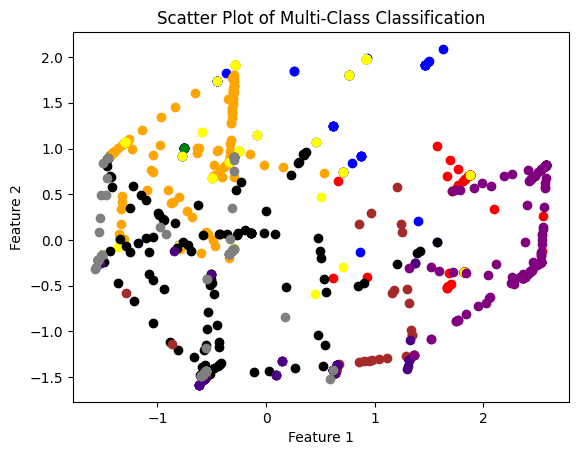

In [ ]:
classes = np.unique(y_resampled)

# Set up colors for each class
colors = ['red', 'blue', 'green', 'orange','yellow','black','brown','indigo','grey','purple']  # Add more colors if needed
# Plot scatter plot
for i, class_label in enumerate(classes):
    # Filter data points belonging to the current class
    X_class = x_pca[y_resampled == class_label]

    # Scatter plot for the current class
    plt.scatter(X_class[:, 0], X_class[:, 1], color=colors[i], label=f'Class {class_label}')

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Multi-Class Classification')

In [ ]:
# classes are moderately overlapped ( from the above graph )

In [ ]:
X_resampled.shape,y_resampled.shape

((1170, 9), (1170,))

In [ ]:
# advanced model evaluation

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
models=[clf,model_l,model_r]
for i in models:
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)
  n_scores = cross_val_score(i,X_resampled, y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
  print(i,"gives accuracy of ",np.mean(n_scores)*100)

OneVsRestClassifier(estimator=SVC(random_state=42)) gives accuracy of  70.65527065527064
LogisticRegression(C=1.5, multi_class='multinomial', solver='saga') gives accuracy of  65.75498575498575
RandomForestClassifier(max_depth=8, max_leaf_nodes=30, n_estimators=8,
                       random_state=42) gives accuracy of  71.39601139601139


In [ ]:
# now we got 75.9% RandomForestClassifier
# so, we gonna use that model
# Now, we are going to predict the height using sequences and the predicted subpopulation of the respective sequence

In [ ]:
model_r.fit(x_train,y_train)
s_pred=model_r.predict(enc_df)
s_pred=list(s_pred)
df_h=pd.DataFrame()
df_h['subpopulation']=s_pred
df_h['height']=list(df_clu1['height'])
enc_dff.columns=enc_dff.columns.astype(str)
df_h=pd.concat([df_h,enc_df],axis=1)
df_h.head()

,subpopulation,height,0,1,2,3,4,5,6,7,8
0,Aus,145.8,0.75,0.5,0.5,2.5,2.5,2.5,0.5,2.5,2.5
1,Indica III,185.6,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5
2,Indica III,203.6,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5
3,Indica III,190.2,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5
4,Indica III,193.8,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5


In [ ]:
df_h.to_csv('pda')

In [ ]:
df_h['f_sub']=df_h.subpopulation.astype('category').cat.codes+1

In [ ]:
"""
freq=df_h['subpopulation'].value_counts(normalize=True).to_dict()
df_h['f_sub']=df_h['subpopulation'].map(freq)
df_h=df_h.drop('subpopulation',axis=1)
df_h.head()
"""

"\nfreq=df_h['subpopulation'].value_counts(normalize=True).to_dict()\ndf_h['f_sub']=df_h['subpopulation'].map(freq)\ndf_h=df_h.drop('subpopulation',axis=1)\ndf_h.head()\n"

In [ ]:
df_h

,subpopulation,height,0,1,2,3,4,5,6,7,8,f_sub
0,Aus,145.80,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5,1
1,Indica III,185.60,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
2,Indica III,203.60,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
3,Indica III,190.20,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
4,Indica III,193.80,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
524,Temperate Japonica,192.07,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5,8
525,Temperate Japonica,196.80,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
526,Temperate Japonica,206.73,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
527,Temperate Japonica,172.46,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8


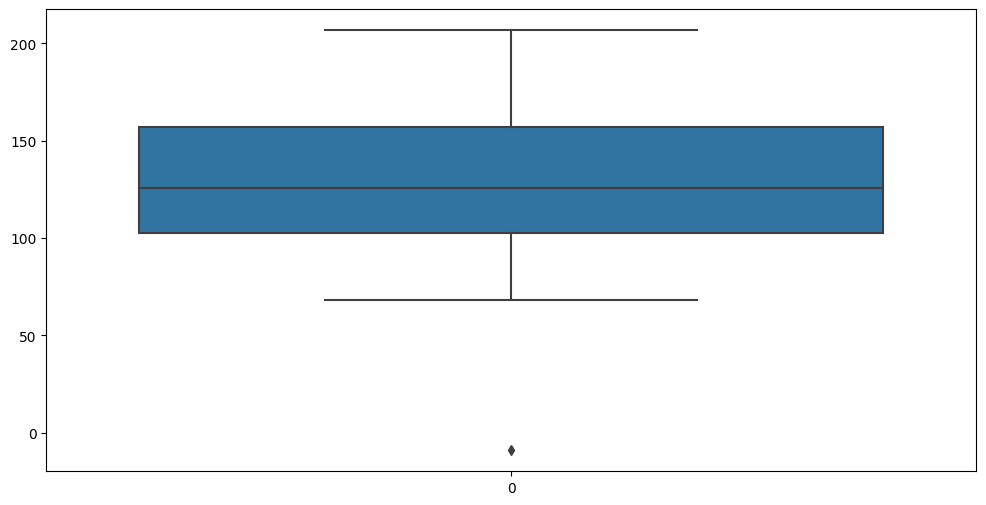

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(df_h['height'])
plt.show()

238.13000000000002
21.249999999999986


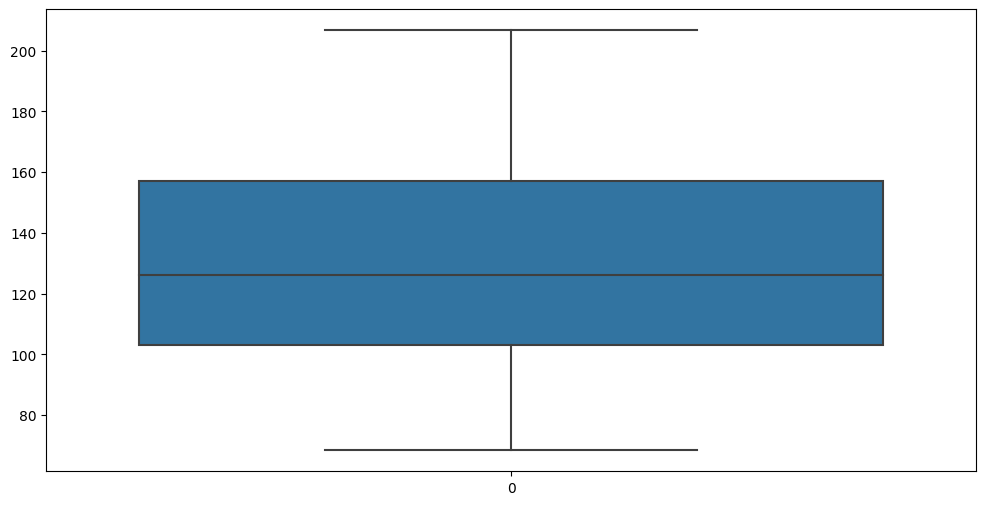

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def Outlier_Treatment(df1,variable):
    global df_final
    percentile25=df1[variable].quantile(0.25)  #q1
    percentile75=df1[variable].quantile(0.75)  #q3
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    print(upper_limit)
    print(lower_limit)
    df_final = df1[ (df1[variable]>=lower_limit) & (df1[variable]<=upper_limit) ]
    plt.figure(figsize=(12,6))
    sns.boxplot(df_final[variable])
    plt.show()
Outlier_Treatment(df_h,'height')

In [ ]:
df_final.shape

(528, 12)

In [ ]:
df_final

,subpopulation,height,0,1,2,3,4,5,6,7,8,f_sub
0,Aus,145.80,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5,1
1,Indica III,185.60,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
2,Indica III,203.60,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
3,Indica III,190.20,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
4,Indica III,193.80,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
524,Temperate Japonica,192.07,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5,8
525,Temperate Japonica,196.80,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
526,Temperate Japonica,206.73,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
527,Temperate Japonica,172.46,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8


In [ ]:
xxh=df_final.iloc[:,1:]
xxh.to_csv('hdata.csv')

In [ ]:
# enc_dff is encoded data fo sequences which we had already did earlier before classification
x_h=df_final.iloc[:,2:]
y_h=df_final['height']

In [ ]:
x_h

,0,1,2,3,4,5,6,7,8,f_sub
0,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5,1
1,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
2,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
3,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
4,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,4
...,...,...,...,...,...,...,...,...,...,...
524,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5,8
525,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
526,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8
527,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,8


In [ ]:
x_h.columns=x_h.columns.astype(str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_h,y_h,test_size=0.33,random_state=42)

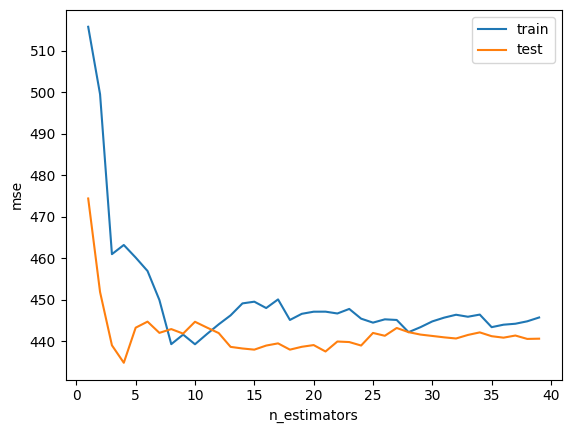

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
tr_score=[]
te_score=[]
values=[i for i in range(1,40)]
for i in range(1,40):
  modelR=RandomForestRegressor(n_estimators=i,max_depth=3,random_state=42,criterion="squared_error")
  modelR.fit(X_train,Y_train)
  y_pred1=modelR.predict(X_train)
  mse1 = mean_squared_error(Y_train, y_pred1)
  y_pred2=modelR.predict(X_test)
  mse2=mean_squared_error(Y_test,y_pred2)
  tr_score.append(mse1)
  te_score.append(mse2)
plt.plot(values,tr_score,label="train")
plt.plot(values,te_score,label="test")
plt.xlabel("n_estimators")
plt.ylabel("mse")
plt.legend()
plt.show()

In [ ]:
"""
grid_par = { 'n_estimators' : [i for i in range(1,25)],
               'criterion':['squared_error','poisson','friedman_mse'],
               'max_depth':[i for i in range(1,20)],
              }
from sklearn.model_selection import GridSearchCV
gss = GridSearchCV(RandomForestRegressor(random_state=42), grid_par, verbose = 1, cv=5, n_jobs = -1)
g_ress = gss.fit(x_h,y_h)
g_ress.best_score_
"""

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


0.2834105324892019

In [ ]:
# print(g_ress.best_params_)
"""
{'criterion': 'squared_error',
 'max_depth': 3
 'n_estimators': 14,
 'random_state': None}
"""

"\n{'criterion': 'squared_error',\n 'max_depth': 3\n 'n_estimators': 14,\n 'random_state': None}\n"

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rr=RandomForestRegressor(n_estimators=14,max_depth=3,random_state=42,criterion='squared_error')
model_rr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=3, n_estimators=14, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
Y_pred=model_rr.predict(X_test)
print("mae: %.2f , accuracy is %.2f%%" % (mae(Y_test,Y_pred),(1-mape(Y_test,Y_pred))*100))

mae: 15.65 , accuracy is 87.63%


In [ ]:
# here i generated new random sequences
import random
nuc=['A','T','C','G']
ss=[]
"""
for i in range(12):
  st="".join(random.choices(nuc,k=9))
  ss.append(st)
"""
ss=['ACTGTATTT']
# encode the sequences using  label encoding
import numpy as np
dicc={'A':0.25,'T':0.50,'C':1,'G':1.5}
encoded=[]
for i in ss:
  array = np.array(list(i))
  new_arr=np.array([dicc[i] for i in array])
  encoded.append((new_arr))


enc_dfff=pd.DataFrame(encoded)
zz=model_r.predict(enc_dfff)
zz=list(zz)
df_ff=pd.DataFrame()
df_ff['subpopulation']=zz
enc_dfff.columns=enc_dfff.columns.astype(str)
df_ff=pd.concat([df_ff,enc_dfff],axis=1)
freq1=df_ff['subpopulation'].value_counts(normalize=True).to_dict()
df_ff['f_sub']=df_ff['subpopulation'].map(freq1)
df_ff=df_ff.drop('subpopulation',axis=1)
final_prediction=model_rr.predict(df_ff)
h_df=pd.DataFrame()
h_df['seq']=ss
h_df['subpopulation']=zz
h_df['height']=list(final_prediction)
h_df

,seq,subpopulation,height
0,ACTGTATTT,VI/Aromatic,155.657871


In [ ]:
freq1

{'VI/Aromatic': 1.0}

In [ ]:
#1st
(203.6+193.8+162.1+156.8+179.14+170.53+97.53)/7

In [ ]:
#6th
(161.8+154.2+141.4+175.77+119.03)/5

In [ ]:
#49th
(96.6+95.2+70.8+105.8+168.4+185.07+112.2+97.77+198.57+193.67+158.07)/11

In [ ]:
#49th
(105.8+168.4+185.07+112.2+97.77)/5

In [ ]:
#12th
(111.2+112.4+104.6+150.67)/4

In [ ]:
#21st
(145.8+178+161)/3

In [ ]:
#24th
(93.2+109.6+86.17)/3